In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils._testing import ignore_warnings
from sklearn.linear_model import SGDClassifier
from sklearn.exceptions import ConvergenceWarning,FitFailedWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

In [3]:
np.random.seed(888)

df = pd.read_csv('20210427-dados-gdcc.csv')

remove_cols = ['DayW']
df.drop(remove_cols, axis=1, inplace=True)

df['Macrocategory'] = df.Macrocategory.astype('category')


months = {1:'Jan', 2:'Feb',3:'Mar',4: 'Apr',5: 'May' ,6:'June',7: 'July',8: 'Aug',9: 'Sept',10:'Oct',11: 'Nov',12: 'Dec'}
df = df.replace({"Month": months})

df['Month'] = df.Month.astype('category')
df['Year'] = df.Year.astype('int')

df = pd.get_dummies(df, columns=["Macrocategory"])
df = pd.get_dummies(df, columns=["Month"])

print(df.columns)
#y = df.Success
#X = df.drop(labels=['Success'], axis=1)


def get_Best_Features(df):
    y = df.Success
    X = df.drop(labels=['Success', 'Year'], axis=1)
    ss = StandardScaler()
    X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
    model = RandomForestRegressor()
    model.fit(X,y)
    names = list(X)
    importances = model.feature_importances_
    
    features_score = []
    
    for i,v in enumerate(importances): 
        features_score.append([names[i],v])
    
    features_score.sort(key=lambda x: x[1],reverse=True)
    
    for f in features_score:
        print(f)
    
    
#get_Best_Features(df)

Index(['Year', 'Dom1', 'Seg2', 'Ter3', 'Qua4', 'Qui5', 'Sex6', 'Sab7',
       'LnGoal', 'LnPledges', 'Duration', 'Rewards', 'dArt', 'NSSj', 'NSSt',
       'GINI', 'Popold', 'Illiteracy', 'LnPopEstm2015', 'LnPIBpercap',
       'LnAreaKM', 'Success', 'Macrocategory_Arq_Urb', 'Macrocategory_Arte',
       'Macrocategory_C&T', 'Macrocategory_Carnaval',
       'Macrocategory_Cin_Video', 'Macrocategory_Circo',
       'Macrocategory_Comunidade', 'Macrocategory_Dança',
       'Macrocategory_Design', 'Macrocategory_Educação',
       'Macrocategory_Esporte', 'Macrocategory_Eventos',
       'Macrocategory_Fotografia', 'Macrocategory_Gastronomia',
       'Macrocategory_Jogos', 'Macrocategory_Jornalismo',
       'Macrocategory_Literatura', 'Macrocategory_Meio Ambiente',
       'Macrocategory_Mob_Transporte', 'Macrocategory_Moda',
       'Macrocategory_Música', 'Macrocategory_Negócios Sociais',
       'Macrocategory_Quadrinhos', 'Macrocategory_Teatro', 'Month_Apr',
       'Month_Aug', 'Month_Dec', 'M

In [4]:
def reescalar_dados(df):
    ss = StandardScaler()
    
    rotulos = df.columns
    
    cols = [col for col in df.columns if col not in ['Year','Success']]   
    df[cols] = StandardScaler().fit_transform(df[cols])    
    
    return df

#df = reescalar_dados(df)

Text(0, 0.5, 'Frequency')

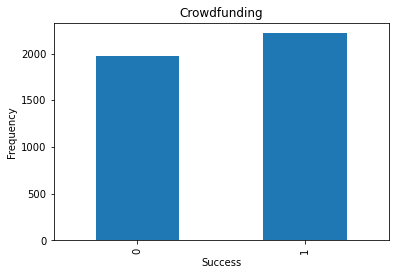

In [5]:
count_classes = pd.value_counts(df['Success'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Crowdfunding")
plt.xlabel("Success")
plt.ylabel("Frequency")

In [6]:
scenarios = [[2011], [2011,2012], [2011,2012,2013], [2011,2012,2013,2014]]



param_dt =  {'criterion': ['gini','entropy'],
            'max_depth':[None, 3, 4, 5, 6, 8, 10, 12, 15],
            'splitter':["best", "random"]}


param_ada = {'base_estimator__max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
             'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30]}

param_rf = {'max_depth':[3, 4, 5, 6, 8, 10, 12, 15, None],
              'n_estimators':[10,50,250,1000]}

param_xgb = {'max_depth':[3, 4, 5, 6, 8, 10, 12, 15, None],
             'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30]}

param_mlp =  {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(50), (100), (200,)],
            'solver':['lbfgs', 'sgd', 'adam'],
            'learning_rate':['constant', 'invscaling', 'adaptive'],
            'learning_rate_init':[0.0001, 0.001, 0.01],
            'alpha':[0.0001, 0.001, 0.01, 0.05, 0.5, 1.0]}

param_svm =  {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
 
param_knn = {'n_neighbors':[1,3,5,7,9,13], 'weights': ['uniform', 'distance']}

param_sgd = {'penalty':['l2', 'l1', 'elasticnet'], 'alpha':[0.0001,0.001, 0.00001, 0.01 ],
            'loss':['squared_epsilon_insensitive','hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
    
param_meta = {'k':[3,7, 5, 9], 'Kp':[5,3, 7,9], 'Hc':[1.0, 2.0, 0.5], 'mode':['selection', 'weighting ','hybrid'] }
    
models = [[SGDClassifier(random_state=888),param_sgd],[KNeighborsClassifier(),param_knn],[SVC(probability=True), param_svm], [MLPClassifier(random_state=888),param_mlp ]]

#models = [[DecisionTreeClassifier(),param_dt], [AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),param_ada], [RandomForestClassifier(),param_rf], [xgb.XGBClassifier(booster='gbtree'),param_xgb]]
#[SGDClassifier(),param_sgd]

In [7]:
def scaler_set(df):
    ss = StandardScaler()
    df = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

    return df




@ignore_warnings(category=(ConvergenceWarning,FitFailedWarning,UserWarning))
def fic():
    for i, scenario in enumerate(scenarios):
        
        print("SCENARIO:", i+1)            

        df_train = df.loc[df['Year'].isin(scenario)]
        df_test = df.loc[~df['Year'].isin(scenario)]        
        
        y_train = df_train.Success
        X_train = df_train.drop(labels=['Success', 'Year'], axis=1)
        X_train = scaler_set(X_train)        
        
        y_test = df_test.Success
        X_test = df_test.drop(labels=['Success', 'Year'], axis=1)
        X_test = scaler_set(X_test)
       
        for j,m in enumerate(models):
            
            #if j!=1:
            #    continue
            
            model = m[0]
            name = type(model).__name__
            param = m[1]
            
            clf = GridSearchCV(model, param, n_jobs=-1, cv=3)
            clf.fit(X_train, y_train)       

            model = clf.best_estimator_
            print(model)

            pred = model.predict(X_test)
            
            if name != "SGDClassifier":
                y_pred_quant = model.predict_proba(X_test)[:, 1]
            else:                
                y_pred_quant = model.decision_function(X_test) #SGD
            
            
            print("acc",accuracy_score(y_test, pred)*100)
            print("auc",metrics.roc_auc_score(y_test, y_pred_quant)*100)
            print("f1", f1_score(y_test, pred)*100)

            print("----------------------------------------")
            
        print("+++++++++++++++++++++++++++++++++++++++")    
    
          
fic()

SCENARIO: 1
SGDClassifier(alpha=0.01, loss='log', penalty='l1', random_state=888)
acc 87.44544287548138
auc 91.97859844977647
f1 88.13970409895705
----------------------------------------
KNeighborsClassifier(n_neighbors=13)
acc 73.7612323491656
auc 81.16053808100314
f1 76.40812557710063
----------------------------------------
SVC(C=100, gamma=0.001, kernel='sigmoid', probability=True)
acc 90.91142490372273
auc 97.14256236607498
f1 91.67450611476953
----------------------------------------
MLPClassifier(activation='logistic', alpha=0.5, hidden_layer_sizes=50,
              learning_rate_init=0.0001, random_state=888, solver='lbfgs')
acc 89.83311938382542
auc 96.49705034258353
f1 90.43940125543216
----------------------------------------
+++++++++++++++++++++++++++++++++++++++
SCENARIO: 2
SGDClassifier(alpha=0.01, loss='perceptron', penalty='l1', random_state=888)
acc 88.28775267538644
auc 94.82576252592072
f1 88.79408418657565
----------------------------------------
KNeighborsClassif

In [8]:
import numpy as np
np.mean([1,2,3])

2.0